In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data Dictionary with first column being datatype.
data = pd.DataFrame(train.dtypes)
data

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
train.shape

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [10]:
data["Missing value"]=train.isnull().sum()
data

,0,Missing value
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [11]:
data["Count"]=train.count()
data

,0,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


In [12]:
data=data.rename(columns={0:'DataType'})
data

,DataType,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


In [13]:
test=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.shape

(418, 11)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

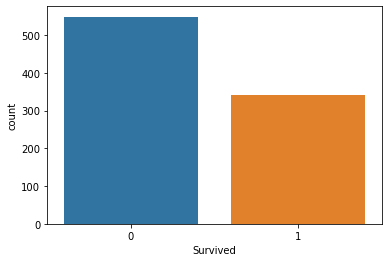

In [17]:
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

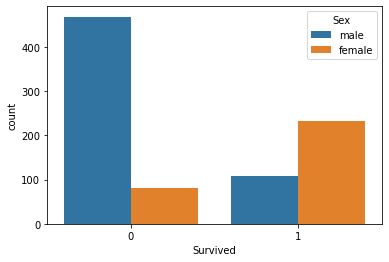

In [18]:
sns.countplot(x="Survived",hue="Sex",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

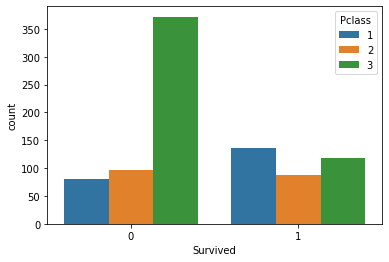

In [19]:
sns.countplot(x="Survived",hue="Pclass",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

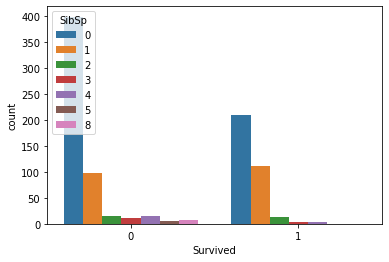

In [20]:
sns.countplot(x="Survived",hue="SibSp",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

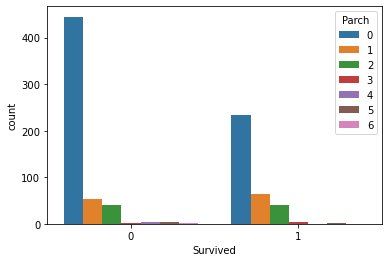

In [21]:
sns.countplot(x="Survived",hue="Parch",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

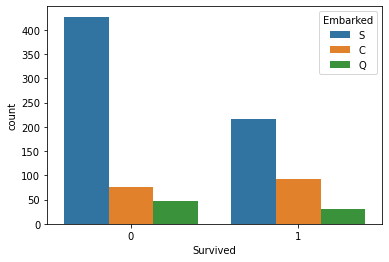

In [22]:
sns.countplot(x="Survived",hue="Embarked",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

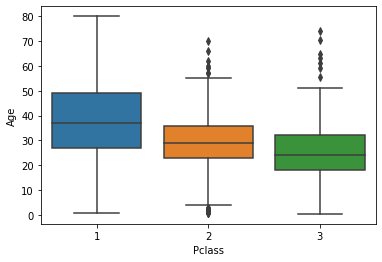

In [23]:
sns.boxplot(x="Pclass",y="Age",data=train)

Observation(s):

1) We can say that people with median age of 35 have taken class 1 ticket.

2) We can say that people with median age of 30 have taken class 3 ticket.

3) We can say that people with a median age of 25 have taken class 2 ticket.

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

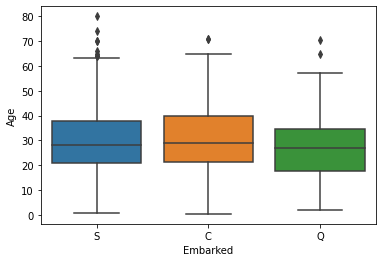

In [24]:
sns.boxplot(x="Embarked",y="Age",data=train)

Observation(s):

1) We cannot say much from this plot as the median lines are almost at the same level for all three ports.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

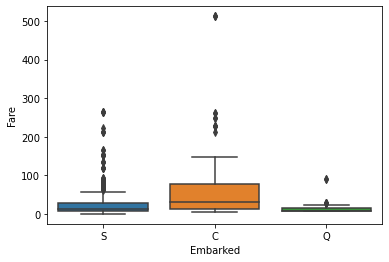

In [25]:
sns.boxplot(x="Embarked",y="Fare",data=train)

Observation(s):

1) The median fare for people embarked from port C wa higher.

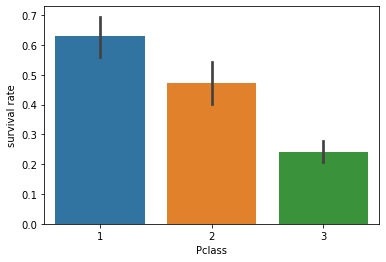

In [26]:
sns.barplot(x="Pclass",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Pclass")
plt.show()

Obervation(s):

1) We can say that people who were in first class had the highest chance of surviving.

2) As the class value increases, the chances of surviving decreases.

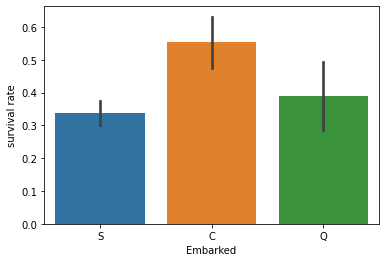

In [27]:
sns.barplot(x="Embarked",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Embarked")
plt.show()

Observation(s):

1) We can say that most of the people who embarked from port C had high chances of surviving.

2) People who embarked from port S had low chances of surviving.

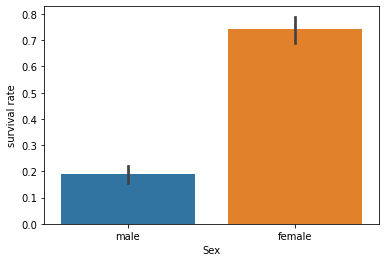

In [28]:
sns.barplot(x="Sex",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Sex")
plt.show()

Observation(s):

1) We can get an insight that females had a higher chance of survival as compared to males.

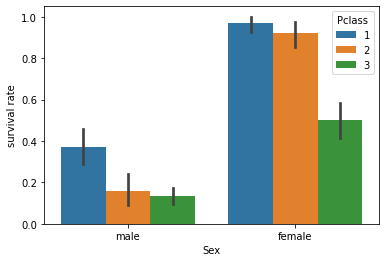

In [29]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=train)
plt.ylabel("survival rate")
plt.xlabel("Sex")
plt.show()

Observation(s):

1) We can say that females of class 1 or 2 had a higher chance of surviving.

2) We can say that males of class 1 had a higher chance of survival in the male section.

3) The lowest survival rate was of the males of class 3.

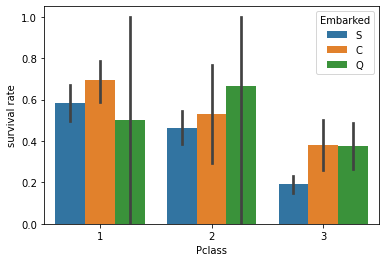

In [30]:
sns.barplot(x="Pclass",y="Survived",hue="Embarked",data=train)
plt.ylabel("survival rate")
plt.xlabel("Pclass")
plt.show()

Observation(s):

1) We can say that the people who were in class 1 and embarked from port C had more chances of surviving.

2) People who were in class 3 and embarked from port S had the lowest chance of surviving.

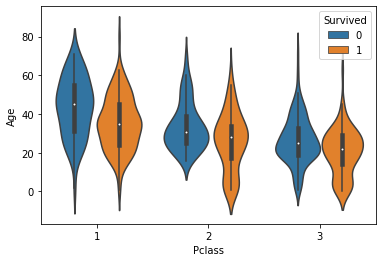

In [31]:
sns.violinplot(x="Pclass", y="Age",hue="Survived", data = train, size = 9)
plt.show()

Observation(s):

1) People between the age 20-40 seemed to have survived if they were from class 1.

2) Poeple from class 2 had less chances of surviving.

# Dealing with missing values

In [32]:
train["Age"][train["Pclass"]==1] =train["Age"][train["Pclass"]==1].fillna(train["Age"][train["Pclass"]==1].median())
train["Age"][train["Pclass"]==2] =train["Age"][train["Pclass"]==2].fillna(train["Age"][train["Pclass"]==2].median())
train["Age"][train["Pclass"]==3] =train["Age"][train["Pclass"]==3].fillna(train["Age"][train["Pclass"]==3].median())

test["Age"][test["Pclass"]==1] =test["Age"][test["Pclass"]==1].fillna(test["Age"][test["Pclass"]==1].median())
test["Age"][test["Pclass"]==2] =test["Age"][test["Pclass"]==2].fillna(test["Age"][test["Pclass"]==2].median())
test["Age"][test["Pclass"]==3] =test["Age"][test["Pclass"]==3].fillna(test["Age"][test["Pclass"]==3].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

<AxesSubplot:>

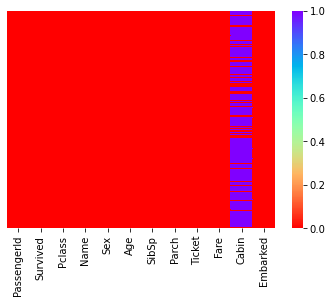

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="rainbow_r")

<AxesSubplot:>

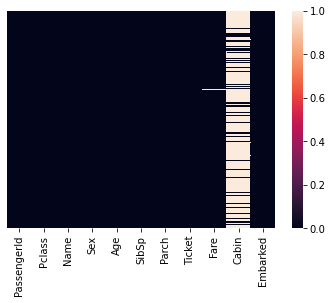

In [34]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=True)

In [35]:
#dropping the column cabin
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [36]:
#dropping the column cabin
train.drop("Fare",axis=1,inplace=True)
test.drop("Fare",axis=1,inplace=True)

In [37]:
#dropping all the remaining NaN values
train.dropna(inplace=True)

In [38]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [39]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

# Categorical to numerical columns

In [40]:
sex=pd.get_dummies(train["Sex"])
sex1=pd.get_dummies(test["Sex"])

embarked=pd.get_dummies(train["Embarked"])
embarked1=pd.get_dummies(test["Embarked"])

In [41]:
train=pd.concat([train,sex,embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0,1,0,0,1


In [42]:
train.drop(["Sex","Embarked","Ticket","Name"],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [43]:
test=pd.concat([test,sex1,embarked1],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S,1,0,0,0,1


In [44]:
test.drop(["Sex","Embarked","Ticket","Name"],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,892,3,34.5,0,0,0,1,0,1,0
1,893,3,47.0,1,0,1,0,0,0,1
2,894,2,62.0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,0,1,0,0,1
4,896,3,22.0,1,1,1,0,0,0,1


# Split the data into train and test data

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.2,random_state=5)

# Model building - logistic regression

In [46]:
#import packages
from sklearn.linear_model import LogisticRegression
#call the function
model1=LogisticRegression()
#train it
model1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
pred1=model1.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy1=accuracy_score(y_test,pred1)
accuracy1

0.8539325842696629

In [49]:
confusion_matrix(y_test,pred1)

array([[107,  12],
       [ 14,  45]])

# Model building - Decision trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=7)
model2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

In [51]:
pred2=model2.predict(x_test)

In [52]:
accuracy2=accuracy_score(y_test,pred2)
accuracy2

0.797752808988764

In [53]:
confusion_matrix(y_test,pred2)

array([[91, 28],
       [ 8, 51]])

# Model building - Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=10)
model3.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [55]:
pred3 = model3.predict(x_test)

In [56]:
accuracy3=accuracy_score(y_test,pred3)
accuracy3

0.8426966292134831

In [57]:
confusion_matrix(y_test,pred3)

array([[105,  14],
       [ 14,  45]])

# Model building - SVM

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

In [59]:
grid_param = {'C': [0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),grid_param,verbose=3)

In [60]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [61]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [62]:
pred4 = grid.predict(x_test)

In [63]:
accuracy4=accuracy_score(y_test,pred4)
accuracy4

0.8033707865168539

In [64]:
confusion_matrix(y_test,pred4)

array([[102,  17],
       [ 18,  41]])

# Final submission

The logistic regression model is used as the final model.

In [65]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,892,3,34.5,0,0,0,1,0,1,0
1,893,3,47.0,1,0,1,0,0,0,1
2,894,2,62.0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,0,1,0,0,1
4,896,3,22.0,1,1,1,0,0,0,1


In [66]:
final_pred = model1.predict(test)
final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [67]:
test['Survived'] = final_pred
test.drop(['Pclass','Age','SibSp','Parch','female','male','C','Q','S'],inplace=True,axis=1)
test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [68]:
test.to_csv('submission_titanic.csv', index=False)